<a href="https://colab.research.google.com/github/hws2002/MachineLearning_PytorchNScikitLearn/blob/master/chapter13/chapter13_6_Project1_fuel_economy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13.6.1 특성 열 사용
https://archive.ics.uci.edu/dataset/9/auto+mpg 데이터를 사용해서 자동차의 연료 효율성을 예측하는 프로젝트를 진행해보자(머신 러닝 벤치마크 데이터셋임)  
먼저 데이터셋을 로드한 후, 불완전한 행을 삭제하고, 훈련 데이터셋과 테스트 데이터셋으로 나누고, 연속적인 특성에 표준화를적용하는 것과 같은 필수적인 전처리 단계를 수행해 보자

In [43]:
import pandas as pd
import tensorflow as tf
dataset_path = tf.keras.utils.get_file(
    origin = "https://archive.ics.uci.edu/static/public/9/auto+mpg.zip",
    extract = True
)
url = dataset_path.replace("auto+mpg.zip", "auto-mpg.data")
column_names = ['MPG', 'Cylinders','Displacement','Horsepower',
                'Weight', 'Acceleration','Model Year','Origin']
df = pd.read_csv(url, names = column_names,
                 na_values="?", comment='\t',
                 sep=" ", skipinitialspace=True)
print(df.head())

    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


In [44]:
# NA행이 있는지 확인하고
has_na = df.isna().any().any()
print(has_na)

na_in_each_column = df.isna().sum()
print(na_in_each_column)

na_in_each_row = df.isna().sum(axis = 1)
print(na_in_each_row)

rows_with_na = df[df.isna().any(axis=1)]
print(rows_with_na)

True
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
393    0
394    0
395    0
396    0
397    0
Length: 398, dtype: int64
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
32   25.0          4          98.0         NaN  2046.0          19.0   
126  21.0          6         200.0         NaN  2875.0          17.0   
330  40.9          4          85.0         NaN  1835.0          17.3   
336  23.6          4         140.0         NaN  2905.0          14.3   
354  34.5          4         100.0         NaN  2320.0          15.8   
374  23.0          4         151.0         NaN  3035.0          20.5   

     Model Year  Origin  
32           71       1  
126          74       1  
330          80       2  
336          80       1  
354          81       2  
374          82       1  


In [45]:
## NA행 삭제
df = df.dropna()
print(df[31:33])

     MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
31  25.0          4         113.0        95.0  2228.0          14.0   
33  19.0          6         232.0       100.0  2634.0          13.0   

    Model Year  Origin  
31          71       3  
33          71       1  


In [46]:
# index 재정렬
df = df.reset_index(drop=True)
print(df[31:33])

     MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
31  25.0          4         113.0        95.0  2228.0          14.0   
32  19.0          6         232.0       100.0  2634.0          13.0   

    Model Year  Origin  
31          71       3  
32          71       1  


In [47]:
## 훈련/테스트 분할:
import sklearn
import sklearn.model_selection
df_train, df_test = sklearn.model_selection.train_test_split(
    df, train_size = 0.8, random_state = 1
)

train_stats = df_train.describe().transpose()
print(train_stats)

              count         mean         std     min     25%     50%     75%  \
MPG           313.0    23.404153    7.666909     9.0    17.5    23.0    29.0   
Cylinders     313.0     5.402556    1.701506     3.0     4.0     4.0     8.0   
Displacement  313.0   189.512780  102.675646    68.0   104.0   140.0   260.0   
Horsepower    313.0   102.929712   37.919046    46.0    75.0    92.0   120.0   
Weight        313.0  2961.198083  848.602146  1613.0  2219.0  2755.0  3574.0   
Acceleration  313.0    15.704473    2.725399     8.5    14.0    15.5    17.3   
Model Year    313.0    75.929712    3.675305    70.0    73.0    76.0    79.0   
Origin        313.0     1.591054    0.807923     1.0     1.0     1.0     2.0   

                 max  
MPG             46.6  
Cylinders        8.0  
Displacement   455.0  
Horsepower     230.0  
Weight        5140.0  
Acceleration    24.8  
Model Year      82.0  
Origin           3.0  


In [58]:
numeric_column_names = [
    'Cylinders', 'Displacement',
    'Horsepower', 'Weight',
    'Acceleration'
]

In [49]:
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()
for col_name in numeric_column_names:
  mean = train_stats.loc[col_name,'mean']
  std = train_stats.loc[col_name,'std']
  df_train_norm.loc[:,col_name] = (df_train_norm.loc[:,col_name] - mean)/std
  df_test_norm.loc[:,col_name] = (df_test_norm.loc[:,col_name] - mean)/std
df_train_norm.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
203,28.0,-0.824303,-0.901020,-0.736562,-0.950031,0.255202,76,3
255,19.4,0.351127,0.413800,-0.340982,0.293190,0.548737,78,1
72,13.0,1.526556,1.144256,0.713897,1.339617,-0.625403,72,1
235,30.5,-0.824303,-0.891280,-1.053025,-1.072585,0.475353,77,1
37,14.0,1.526556,1.563051,1.636916,1.470420,-1.359240,71,1


### `Model Year` 처리
Model Year 정보를 그룹으로 묶어 bucket을 나누어 보자  
toch.bucketize 함수를 사용할 것임

In [59]:

import torch
boundaries = torch.tensor([73,76,79])
v = torch.tensor(df_train_norm['Model Year'].values)
df_train_norm['Model Year Bucketed'] = torch.bucketize(
    v, boundaries, right = True
)
v = torch.tensor(df_test_norm['Model Year'].values)
df_test_norm['Model Year Bucketed'] = torch.bucketize(
    v, boundaries, right = True
)

numeric_column_names.append('Model Year Bucketed')

In [60]:
df_train_norm.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Model Year Bucketed
203,28.0,-0.824303,-0.901020,-0.736562,-0.950031,0.255202,76,3,2
255,19.4,0.351127,0.413800,-0.340982,0.293190,0.548737,78,1,2
72,13.0,1.526556,1.144256,0.713897,1.339617,-0.625403,72,1,0
235,30.5,-0.824303,-0.891280,-1.053025,-1.072585,0.475353,77,1,2
37,14.0,1.526556,1.563051,1.636916,1.470420,-1.359240,71,1,0


### `Origin` 처리
이제 순서가 없는 범주형 특징인 Origin에 대한 리스트를 정의해 보자  
파이토치에서 범주형 특성을 다루는 방법에는 두 가지가 있음.  
1. 임베딩 층인 `nn.Embedding`을 사용하거나 - 각 인덱스를 훈련 가능한 float 타입의 랜덤 벡터에 매핑
2. 원-핫 인코딩 벡터(indicator 라고도 함)을 사용하는 것 - 인덱스 0이 [1,0,0], 인덱스 1이 [0,1,0]으로 인코딩되는 식  

임베딩 층을 훈련 가능한 가중치 행렬을 원-핫 인코딩에 곱한 더 효율적인 구현이라고 생각할 수 있음.  

범주 개수가 많은 경우 범주 개수보다 적은 수의 차원을 가진 임베딩 층을 사용하면 성능을 향상시킬수 있음.  

이번 프로젝트에서는 범주형 특성에 원-핫 인코딩 방식을 적용하여 이를 밀집 형태로 변환해보자.  


In [61]:
from torch.nn.functional import one_hot
total_origin = len(set(df_train_norm['Origin']))
origin_encoded = one_hot(torch.from_numpy(
    df_train_norm['Origin'].values) % total_origin)
print(origin_encoded[:10,:])

tensor([[0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0]])


In [68]:
x_train_numeric = torch.tensor(
    df_train_norm[numeric_column_names].values)
x_train = torch.cat([x_train_numeric, origin_encoded],1).float()
print(x_train[:5,:])

tensor([[-8.2430e-01, -5.3092e-01, -4.9921e-01, -5.5526e-01, -1.6412e-03,
          3.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00],
        [ 3.5113e-01,  3.4562e-01,  1.8646e-01,  7.7634e-01,  1.0991e+00,
          2.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00],
        [-8.2430e-01, -8.9128e-01, -5.2559e-01, -8.7461e-01,  2.9189e-01,
          1.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00],
        [-8.2430e-01, -1.0082e+00, -1.0003e+00, -1.1103e+00,  2.5520e-01,
          3.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00],
        [-8.2430e-01, -8.2310e-01, -7.6293e-01, -9.0879e-01, -5.5202e-01,
          3.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])


In [69]:
origin_encoded = one_hot(torch.from_numpy(
    df_test_norm['Origin'].values) % total_origin)
x_test_numeric = torch.tensor(
    df_test_norm[numeric_column_names].values)
x_test = torch.cat([x_test_numeric,origin_encoded],axis = 1).float()

In [71]:
# 마지막으로 정답 MPG 값으로부터 레이블 텐서를 생성하자
y_train = torch.tensor(df_train_norm['MPG'].values).float()
y_test = torch.tensor(df_test_norm['MPG'].values).float()

# 13.6.2 DNN 회귀 모델 훈련하기
특서과 레이블을 구성한 후, 훈련 데이터를 위해 배치 크기 8을 사용하는 데이터 로더를 생성해보자

In [72]:
from torch.utils.data import TensorDataset, DataLoader
train_ds = TensorDataset(x_train, y_train)
batch_size = 8
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

In [85]:
import torch.nn as nn
# 다음으로 각각 8개의 은닉 유닛과 4개의 은닉 유닛을 가진 두개의 완전 연결 층으로 구성된 모델을 만들어보자

# nn.Sequential을 활용한 방법
model = nn.Sequential(
    nn.Linear(x_train.shape[1],8),
    nn.ReLU(),
    nn.Linear(8,4),
    nn.ReLU(),
    nn.Linear(4,1)
)
print(model)
# nn.Module을 활용한 방법
class MyModule(nn.Module):
  def __init__(self,input_size):
    super().__init__()
    l1 = nn.Linear(input_size, 8)
    a1 = nn.ReLU()
    l2 = nn.Linear(8,4)
    a2 = nn.ReLU()
    l3 = nn.Linear(4,1)
    l = [l1, a1, l2, a2, l3]
    self.module_list = nn.ModuleList(l)

  def forawrd(self,x):
    for f in self.module_list:
      x = f(x)
    return x
model = MyModule(x_train.shape[1])
print(model)
# 책의 방법

hidden_units = [8,4]
input_size = x_train.shape[1]
all_layers = []
for hidden_unit in hidden_units:
  layer = nn.Linear(input_size, hidden_unit)
  all_layers.append(layer)
  all_layers.append(nn.ReLU())
  input_size = hidden_unit
all_layers.append( nn.Linear(hidden_units[-1],1))
model = nn.Sequential(*all_layers)
model

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)
MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=9, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
  )
)


Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [86]:
# 회귀를 위한 MSE손실 함수를 정의하고 최적화를 위해 확률적 경사 하강법을 사용해보자
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)


In [87]:
# 이제 200번의 에포크동안 모델을 훈련하고, 20번 에포크마다 훈련 손실을 출력해보자
torch.manual_seed(1)
num_epochs = 200
loss_hist_train = [0] * num_epochs
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)[:,0]
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist_train[epoch] += loss.item()
  loss_hist_train[epoch] /= (x_train.shape[0]/batch_size)
  if epoch % 20 == 0:
    print(f'epoch : {epoch} loss : {loss_hist_train[epoch]:.4f}')

epoch : 0 loss : 568.8733
epoch : 20 loss : 9.5743
epoch : 40 loss : 8.3235
epoch : 60 loss : 8.0378
epoch : 80 loss : 7.7006
epoch : 100 loss : 7.4024
epoch : 120 loss : 7.0655
epoch : 140 loss : 7.1309
epoch : 160 loss : 7.3166
epoch : 180 loss : 6.5254


Text(0, 0.5, 'Train loss')

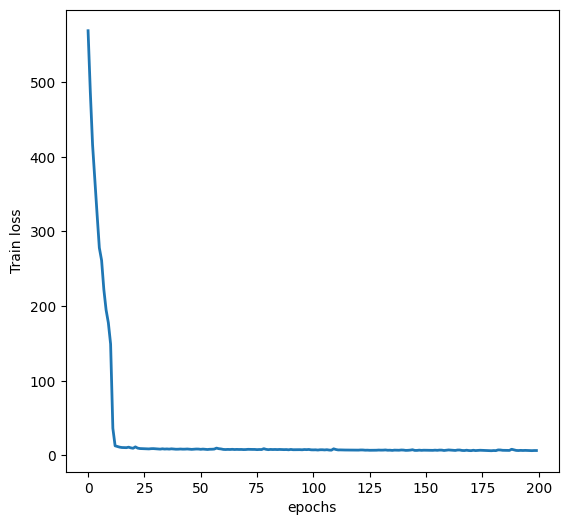

In [96]:
# epoch에 따른 loss의 변화를 그려보자
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (14,6))
ax = fig.add_subplot(1,2,1)
plt.plot(loss_hist_train, lw = 2)
ax.set_xlabel('epochs')
ax.set_ylabel('Train loss')


In [98]:
# 이제 테스트 데이터셋에서 훈련된 모델의 회귀 성능을 평가해보자
# 새로운 데이터 포인트의 타깃 값을 예측하기 위해 해당 데이터 포인트의 특성을 몯레에 공급하자
with torch.no_grad():
  pred = model(x_test.float())[:,0]
  loss = loss_fn(pred, y_test)
  print(f'test MSE : {loss.item():.4f}')
  print(f'test MAE : {nn.L1Loss()(pred, y_test).item():.4f}')

test MSE : 8.0723
test MAE : 1.9377
